In [1]:
%matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np


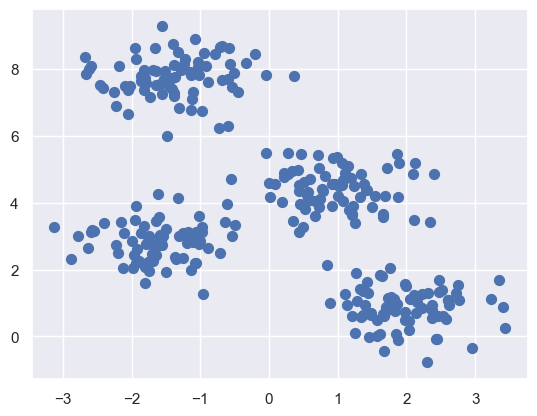

In [2]:
from sklearn.datasets import make_blobs
x,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:,0],x[:,1], s=50)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)
y_kmeans

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0])

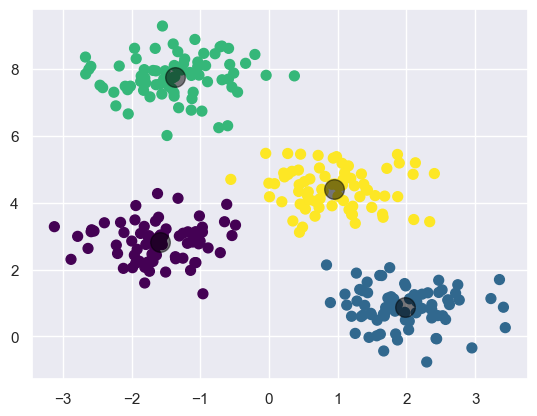

In [4]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x,n_clusters, rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(x.shape[0])[:n_clusters]
    centers= x[i]

    while True:
        labels= pairwise_distances_argmin(x, centers)
        new_centers = np.array([x[labels==i].mean(0) for i in range(n_clusters)])

        if np.all(centers==new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(x,4)
plt.scatter(x[:,0],x[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)


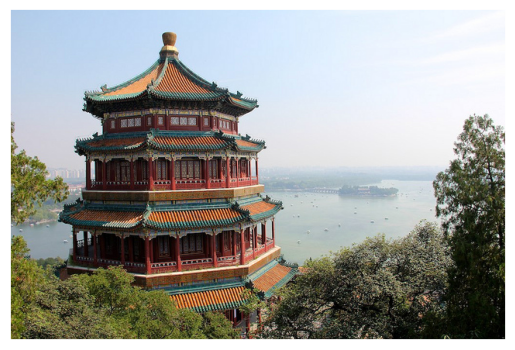

In [47]:
#COLOR COMPRESSIONN USNG K MEANS CLUSTERING
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [48]:
china.shape

(427, 640, 3)

In [49]:
data= china/255.0
data=data.reshape(427*640,3)
data.shape
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [50]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors  = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G,color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1),ylim=(0,1))

    ax[1].scatter(R, B, color=colors, marker= '.')
    ax[1].set(xlabel='Red', ylabel='Blue',xlim=(0,1), ylim=(0,1))

    fig.suptitle(title,size=20)

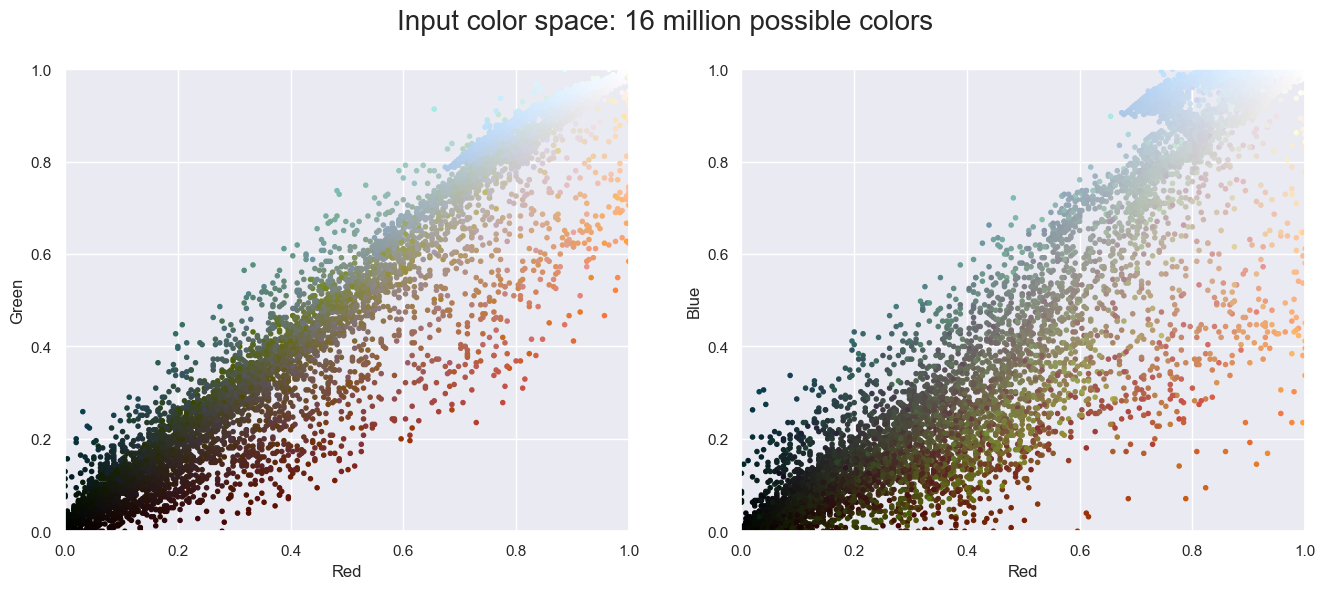

In [44]:
plot_pixels(data, title='Input color space: 16 million possible colors')

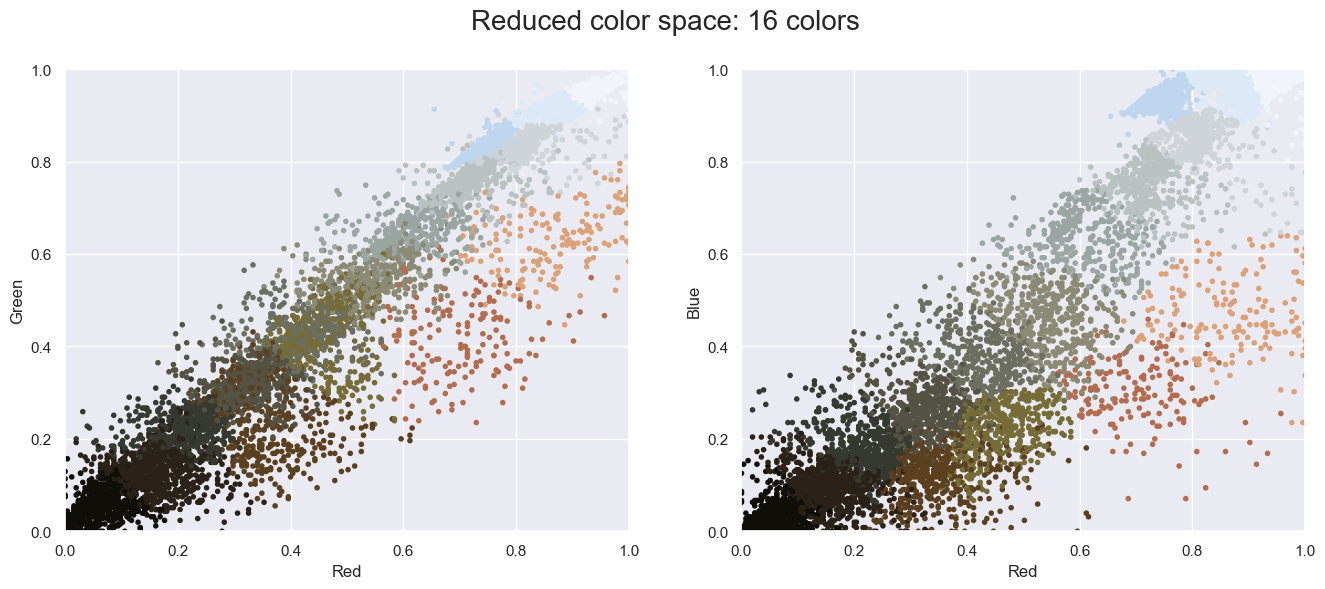

In [51]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors= kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors, title = 'Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

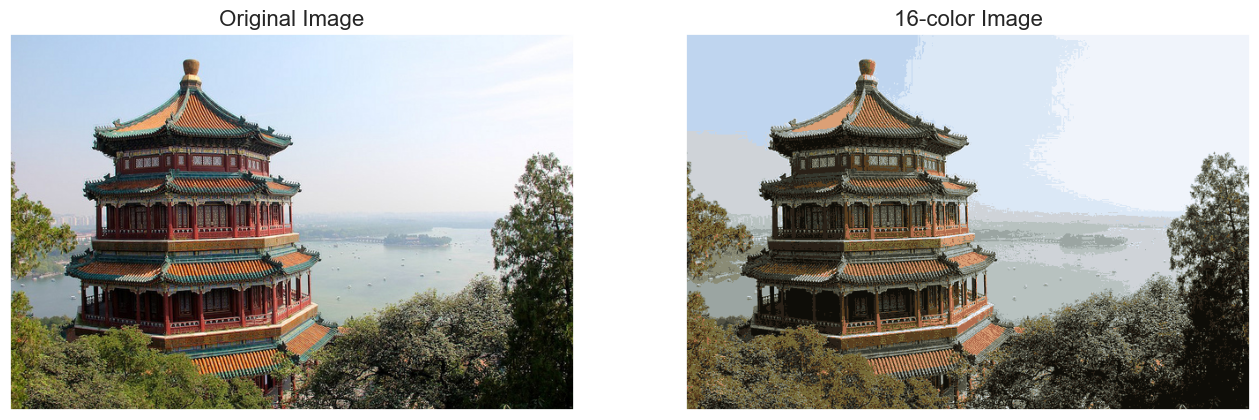

In [52]:
china_recolored = new_colors.reshape(china.shape)

fig, ax= plt.subplots(1,2, figsize=(16,6), subplot_kw = dict(xticks=[], yticks=[]))
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)